In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [280]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('train.csv')

# Display the dataset
print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [281]:
import pandas as pd

# Load the test dataset
test_df = pd.read_csv('test.csv')

# Display the dataset
print(test_df.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [282]:
import pandas as pd

# Load the gender submission dataset
gender_submission_df = pd.read_csv('gender_submission.csv')

# Display the dataset
print(gender_submission_df.head())

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [283]:
# Merge test dataset with gender_submission predictions based on PassengerId
merged_df = pd.merge(test_df, gender_submission_df, on='PassengerId')

# Display the merged dataframe
print(merged_df.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Survived  
0  34.5      0      0   330911   7.8292   NaN        Q         0  
1  47.0      1      0   363272   7.0000   NaN        S         1  
2  62.0      0      0   240276   9.6875   NaN        Q         0  
3  27.0      0      0   315154   8.6625   NaN        S         0  
4  22.0      1      1  3101298  12.2875   NaN        S         1  


In [284]:
# Check for missing values in the train dataset
print(merged_df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64


In [285]:
# Handle missing values in the train dataset (e.g., fill missing values)
merged_df['Age'].fillna(train_df['Age'].median(), inplace=True)
print(merged_df.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Survived  
0  34.5      0      0   330911   7.8292   NaN        Q         0  
1  47.0      1      0   363272   7.0000   NaN        S         1  
2  62.0      0      0   240276   9.6875   NaN        Q         0  
3  27.0      0      0   315154   8.6625   NaN        S         0  
4  22.0      1      1  3101298  12.2875   NaN        S         1  


In [286]:
# Drop unnecessary columns 
merged_df.drop(['Name', 'Ticket','Cabin'], axis=1, inplace=True)
print(merged_df.head())

   PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Survived
0          892       3    male  34.5      0      0   7.8292        Q         0
1          893       3  female  47.0      1      0   7.0000        S         1
2          894       2    male  62.0      0      0   9.6875        Q         0
3          895       3    male  27.0      0      0   8.6625        S         0
4          896       3  female  22.0      1      1  12.2875        S         1


In [287]:
# Handle missing values in the train dataset (e.g., fill missing values)
merged_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)
print(merged_df.head())

   PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Survived
0          892       3    male  34.5      0      0   7.8292        Q         0
1          893       3  female  47.0      1      0   7.0000        S         1
2          894       2    male  62.0      0      0   9.6875        Q         0
3          895       3    male  27.0      0      0   8.6625        S         0
4          896       3  female  22.0      1      1  12.2875        S         1


In [288]:
# Check for missing values in the train dataset
print(merged_df.isnull().sum())

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Survived       0
dtype: int64


In [297]:
print(merged_df.dtypes)

PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
Survived        object
dtype: object


In [290]:
print(merged_df.head())

   PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Survived
0          892       3    male  34.5      0      0   7.8292        Q         0
1          893       3  female  47.0      1      0   7.0000        S         1
2          894       2    male  62.0      0      0   9.6875        Q         0
3          895       3    male  27.0      0      0   8.6625        S         0
4          896       3  female  22.0      1      1  12.2875        S         1


In [291]:
# Summary statistics
print(merged_df.describe())

       PassengerId      Pclass         Age       SibSp       Parch  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    2.265550   29.805024    0.447368    0.392344   
std     120.810458    0.841838   12.667969    0.896760    0.981429   
min     892.000000    1.000000    0.170000    0.000000    0.000000   
25%     996.250000    1.000000   23.000000    0.000000    0.000000   
50%    1100.500000    3.000000   28.000000    0.000000    0.000000   
75%    1204.750000    3.000000   35.750000    1.000000    0.000000   
max    1309.000000    3.000000   76.000000    8.000000    9.000000   

             Fare    Survived  
count  418.000000  418.000000  
mean    35.576535    0.363636  
std     55.850103    0.481622  
min      0.000000    0.000000  
25%      7.895800    0.000000  
50%     14.454200    0.000000  
75%     31.471875    1.000000  
max    512.329200    1.000000  


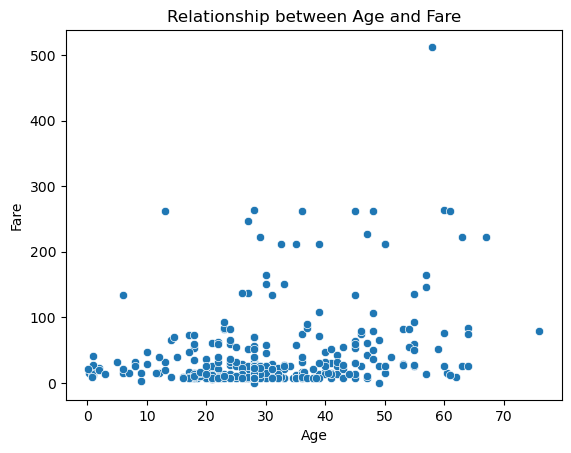

In [292]:
# Explore the relationship between age and fare
sns.scatterplot(x='Age', y='Fare', data=merged_df)
plt.title('Relationship between Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

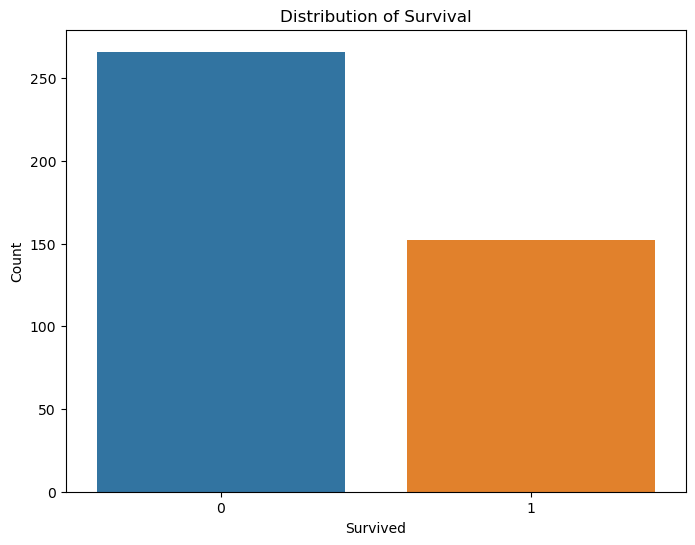

In [293]:
# Visualize the distribution of the target variable 'Survived'
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=merged_df)
plt.title('Distribution of Survival')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

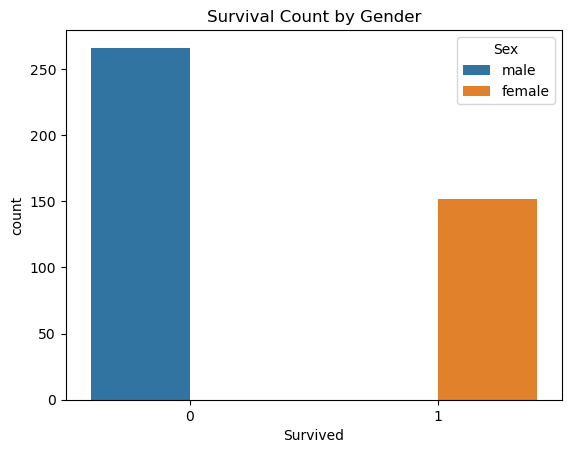

In [294]:
# Visualize the survival count by gender
sns.countplot(x='Survived', hue='Sex', data=merged_df)
plt.title('Survival Count by Gender')
plt.show()

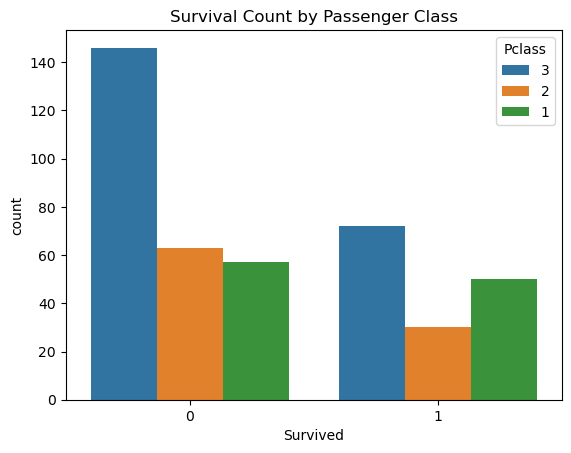

In [298]:
# Convert 'Pclass' to strings
merged_df['Pclass'] = merged_df['Pclass'].astype(str)

# Survival rate by passenger class
sns.countplot(x='Survived', hue='Pclass', data=merged_df)
plt.title('Survival Count by Passenger Class')
plt.show()

C:\Users\Diya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


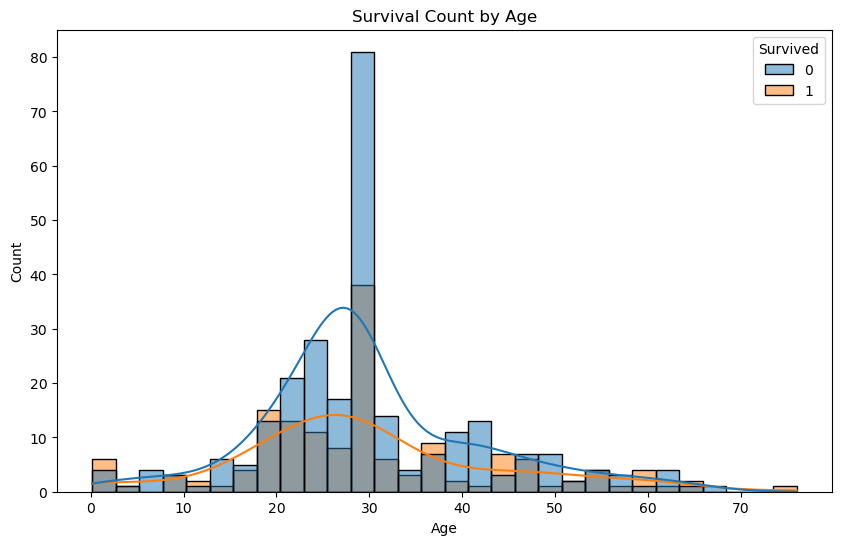

In [299]:
# Survival rate by 
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', data=merged_df, hue='Survived', kde=True, bins=30)
plt.title('Survival Count by Age')
plt.xlabel('Age')
plt.show()

C:\Users\Diya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


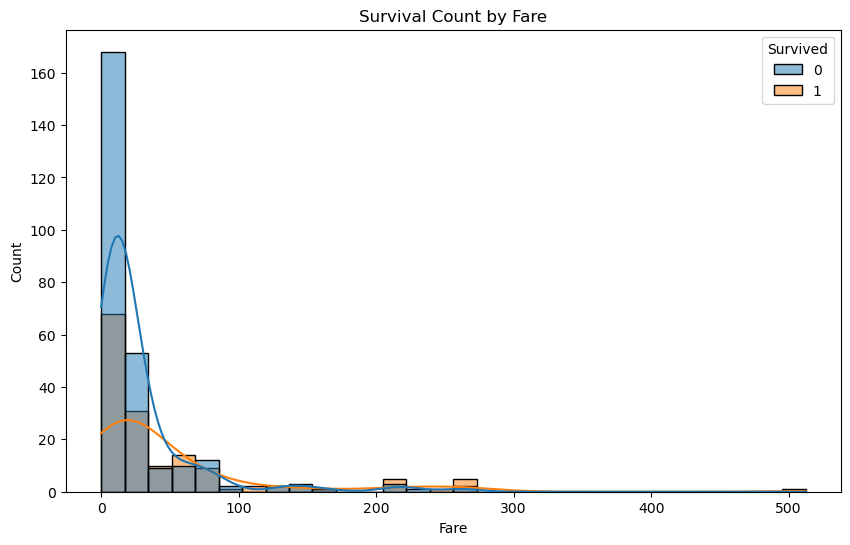

In [300]:
# Survival rate by fare
plt.figure(figsize=(10, 6))
sns.histplot(x='Fare', data=merged_df, hue='Survived', kde=True, bins=30)
plt.title('Survival Count by Fare')
plt.xlabel('Fare')
plt.show()

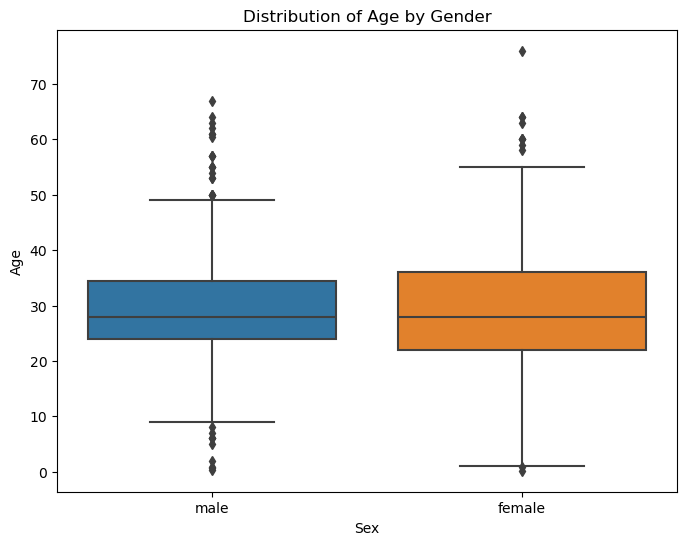

In [301]:
#Relationship between 'Sex' and 'Age'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Age', data=merged_df)
plt.title('Distribution of Age by Gender')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

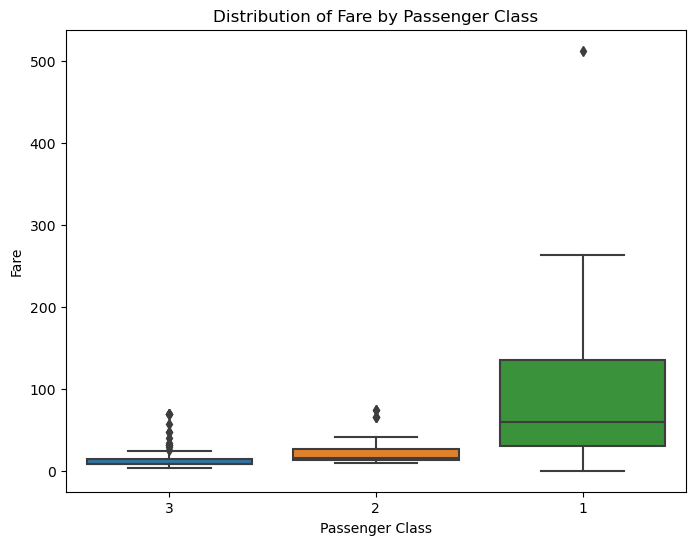

In [302]:
#Relationship between 'Pclass' and 'Fare'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=merged_df)
plt.title('Distribution of Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

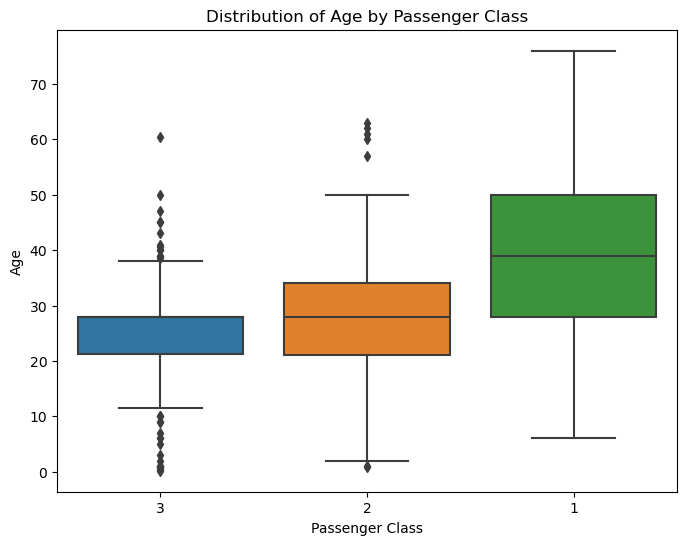

In [303]:
#Relationship between 'Pclass' and 'Age'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=merged_df)
plt.title('Distribution of Age by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

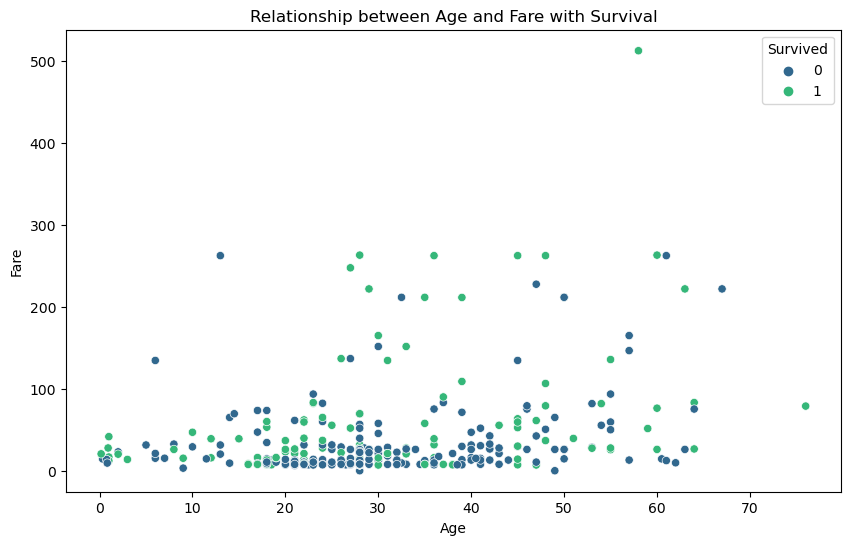

In [304]:
#Relationship between 'Age' and 'Fare' with 'Survived' 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=merged_df, hue='Survived', palette='viridis')
plt.title('Relationship between Age and Fare with Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived')
plt.show()